# 🏬 Superstore Analytics — Análise de Vendas e Lucro

| Área de foco    | KPIs / Visualizações                        | Ferramentas         |
| --------------- | ------------------------------------------- | ------------------- |
| **Financeiro**  | Lucro total, margem, top produtos rentáveis | pandas + seaborn    |
| **Vendas**      | Volume mensal, sazonalidade, ticket médio   | matplotlib / plotly |
| **Geográfico**  | Mapa interativo por região/estado           | plotly.express      |
| **Clientes**    | Segmentos de clientes mais lucrativos       | pandas / seaborn    |
| **Operacional** | Entregas atrasadas, eficiência logística    | pandas / matplotlib |

In [4]:
!pip install pandas numpy matplotlib seaborn plotly

  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.8 MB 12.3 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.8 MB 11.9 MB/s eta 0:00:01
   ---------------------- ----------------- 7.1/12.8 MB 11.8 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.8 MB 11.9 MB/s eta 0:00:01

In [22]:
# ==========================================================
# 🧩 1. Importação de bibliotecas e carregamento do dataset
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Configurações de estilo
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 6)

# Leitura do dataset
df = pd.read_csv("../data/raw/Superstore.csv", encoding='latin-1')

# Visualização inicial
print(f"Shape do dataset: {df.shape}")
df.head()

Shape do dataset: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 📊 Informações do Dataset

In [23]:
# ==========================================================
# 2️⃣ Exploração Inicial e Limpeza de Dados
# ==========================================================

# Informações gerais
print("Informações do Dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())
print("\nValores faltantes:")
print(df.isnull().sum())
print("\nDados duplicados:", df.duplicated().sum())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null

In [24]:
# ==========================================================
# 3️⃣ Pré-processamento de Dados
# ==========================================================

# ==========================================================
#  1. Limpeza e conversão das colunas de data
# ==========================================================

date_columns = ['Order Date', 'Ship Date']

for col in date_columns:
    if col in df.columns:
        # Limpeza para remover qualquer caractere invisível
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r'[^0-9-]', '', regex=True)  # mantém só números e hífen
        )
        
        # Conversão para datetime
        df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce')

# ==========================================================
# 2. Criação de colunas derivadas
# ==========================================================

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%B')
df['Quarter'] = df['Order Date'].dt.quarter
df['Days_to_Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# ==========================================================
#  3. Checagem geral
# ==========================================================

print("Colunas do dataset:")
print(df.columns.tolist())

print("\nTipos de dados:")
print(df.dtypes)

print("\nAmostra dos dados processados:")
df.head()


Colunas do dataset:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Month_Name', 'Quarter', 'Days_to_Ship']

Tipos de dados:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profi

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month_Name,Quarter,Days_to_Ship
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013,11,November,4,3
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013,11,November,4,3
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013,6,June,2,4
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,10,October,4,7
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,10,October,4,7


## 💰 Análise Financeira

💵 Lucro Total: R$ 286,397.02
📊 Vendas Totais: R$ 2,297,200.86
📈 Margem de Lucro: 12.47%

🏆 Top 10 Produtos mais Rentáveis:
                                                        Profit      Sales  \
Product Name                                                                
Canon imageCLASS 2200 Advanced Copier               25199.9280  61599.824   
Fellowes PB500 Electric Punch Plastic Comb Bind...   7753.0390  27453.384   
Hewlett Packard LaserJet 3310 Copier                 6983.8836  18839.686   
Canon PC1060 Personal Laser Copier                   4570.9347  11619.834   
HP Designjet T520 Inkjet Large Format Printer -...   4094.9766  18374.895   
Ativa V4110MDD Micro-Cut Shredder                    3772.9461   7699.890   
3D Systems Cube Printer, 2nd Generation, Magenta     3717.9714  14299.890   
Plantronics Savi W720 Multi-Device Wireless Hea...   3696.2820   9367.290   
Ibico EPK-21 Electric Binding System                 3345.2823  15875.916   
Zebra ZM400 Thermal Label Prin

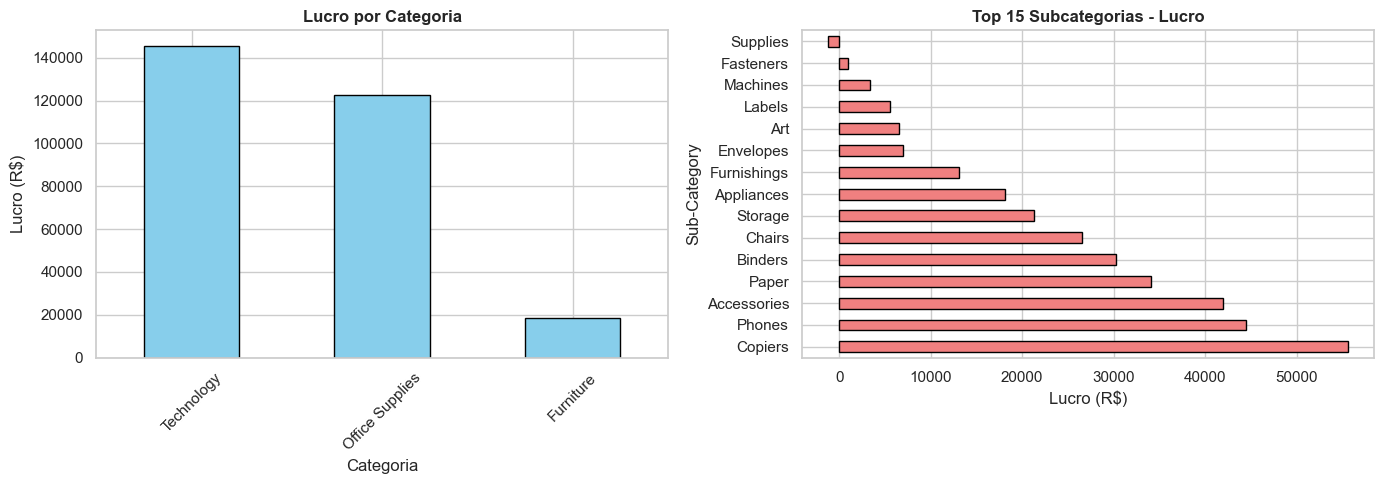

In [25]:
# Lucro total e margem de lucro
total_profit = df['Profit'].sum()
total_sales = df['Sales'].sum()
profit_margin = (total_profit / total_sales) * 100

print(f"💵 Lucro Total: R$ {total_profit:,.2f}")
print(f"📊 Vendas Totais: R$ {total_sales:,.2f}")
print(f"📈 Margem de Lucro: {profit_margin:.2f}%")

# Top 10 produtos mais rentáveis
top_products = df.groupby('Product Name').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Quantity': 'sum'
}).sort_values('Profit', ascending=False).head(10)

print("\n🏆 Top 10 Produtos mais Rentáveis:")
print(top_products)

# Lucro por categoria
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Lucro por categoria
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Lucro por Categoria', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Lucro (R$)')
axes[0].set_xlabel('Categoria')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Lucro por subcategoria (top 15)
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(15)
profit_by_subcategory.plot(kind='barh', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Top 15 Subcategorias - Lucro', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Lucro (R$)')

plt.tight_layout()
plt.show()

## 📈 Análise de Vendas

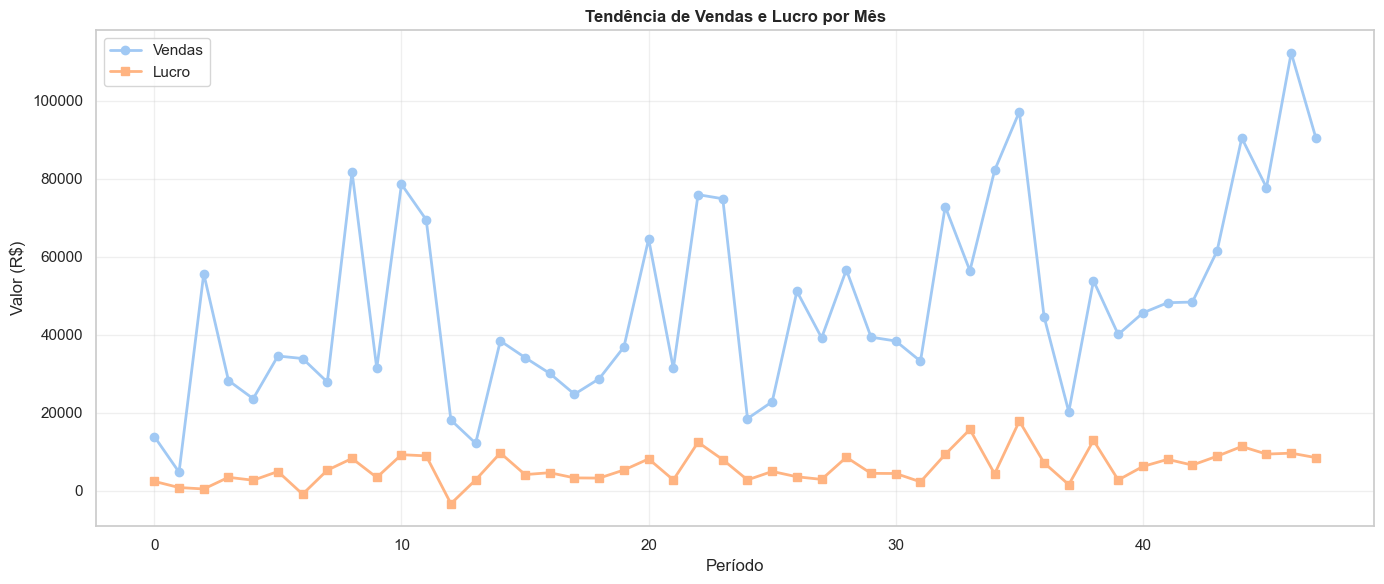


📊 Vendas por Trimestre:
Quarter
1    354791.5710
2    445056.4654
3    618940.3887
4    878412.4352
Name: Sales, dtype: float64

🎫 Ticket Médio por Mês:
Month
3     293.019094
1     246.423611
10    241.267077
11    238.796220
12    233.762955
8     224.773875
9     223.499350
4     213.954099
7     211.272370
5     208.163049
Name: Sales, dtype: float64


In [26]:
# Vendas por ano e mês
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Gráfico de tendência mensal
fig = plt.figure(figsize=(14, 6))
plt.plot(range(len(monthly_sales)), monthly_sales['Sales'], marker='o', label='Vendas', linewidth=2)
plt.plot(range(len(monthly_sales)), monthly_sales['Profit'], marker='s', label='Lucro', linewidth=2)
plt.title('Tendência de Vendas e Lucro por Mês', fontsize=12, fontweight='bold')
plt.xlabel('Período')
plt.ylabel('Valor (R$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Vendas por trimestre
quarterly_sales = df.groupby('Quarter')['Sales'].sum()
print("\n📊 Vendas por Trimestre:")
print(quarterly_sales)

# Ticket médio
avg_ticket = df.groupby('Month')['Sales'].mean().sort_values(ascending=False)
print("\n🎫 Ticket Médio por Mês:")
print(avg_ticket.head(10))

## 🌍 Análise Geográfica

🗺️ Vendas por Região:
               Sales       Profit  Quantity
Region                                     
West     725457.8245  108418.4489     12266
East     678781.2400   91522.7800     10618
Central  501239.8908   39706.3625      8780
South    391721.9050   46749.4303      6209


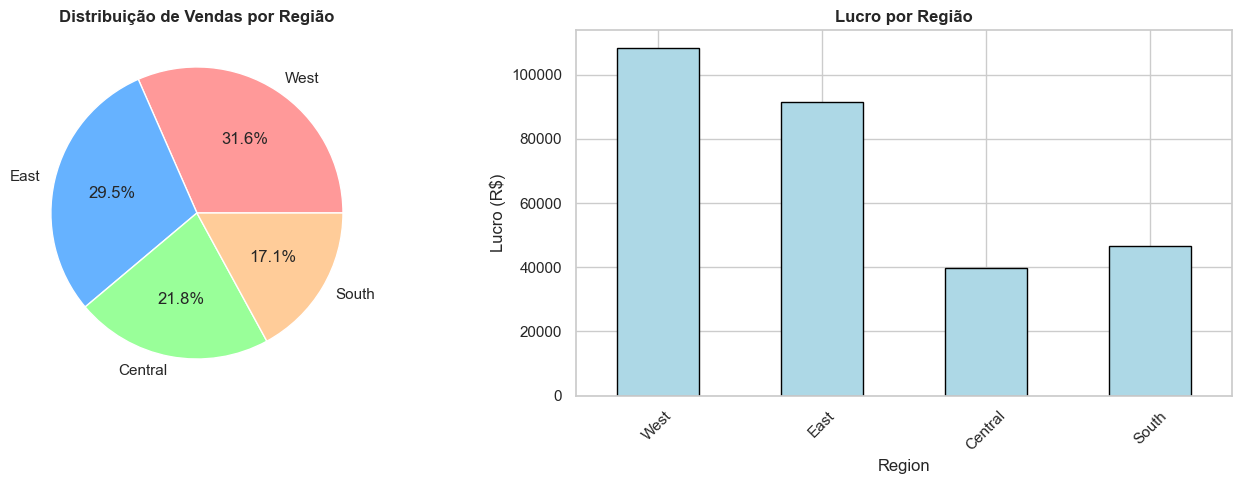


🏆 Top 10 Estados - Vendas:
State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


In [27]:
# Vendas e Lucro por Região
regional_sales = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values('Sales', ascending=False)

print("🗺️ Vendas por Região:")
print(regional_sales)

# Gráfico de distribuição por região
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

regional_sales['Sales'].plot(kind='pie', ax=axes[0], autopct='%1.1f%%', 
                             colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
axes[0].set_title('Distribuição de Vendas por Região', fontsize=12, fontweight='bold')
axes[0].set_ylabel('')

regional_sales['Profit'].plot(kind='bar', ax=axes[1], color='lightblue', edgecolor='black')
axes[1].set_title('Lucro por Região', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Lucro (R$)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Vendas por Estado (top 10)
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print("\n🏆 Top 10 Estados - Vendas:")
print(top_states)

## 👥 Análise de Clientes

📊 Análise por Segmento de Cliente:
                    Sales       Profit  Total_Orders
Segment                                             
Consumer     1.161401e+06  134119.2092          5191
Corporate    7.061464e+05   91979.1340          3020
Home Office  4.296531e+05   60298.6785          1783


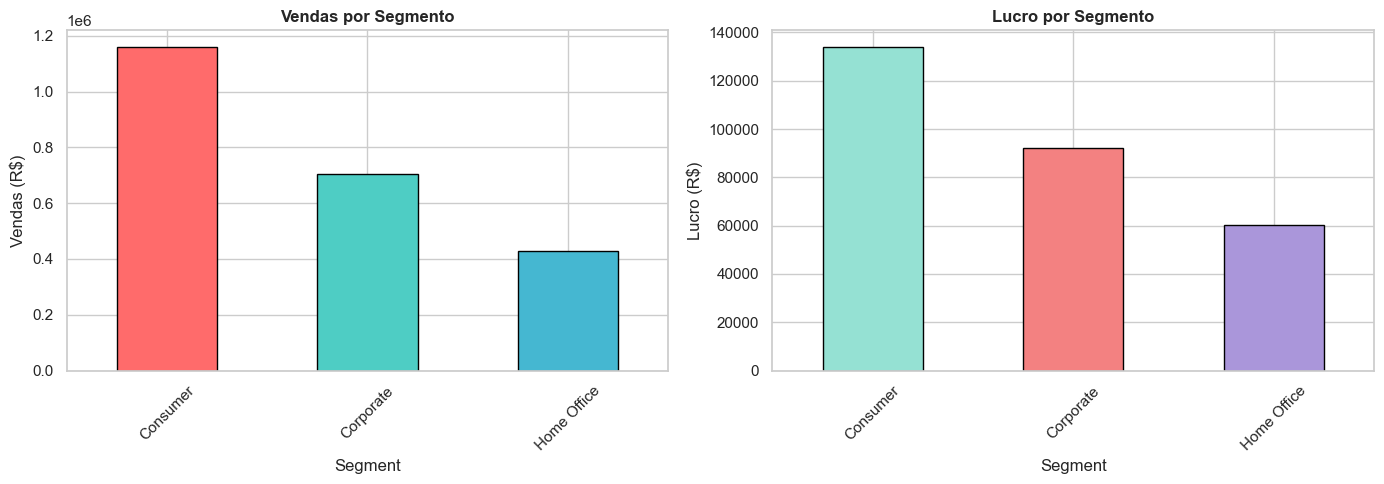


🏆 Top 15 Clientes - Vendas:
                        Sales     Profit
Customer Name                           
Sean Miller         25043.050 -1980.7393
Tamara Chand        19052.218  8981.3239
Raymond Buch        15117.339  6976.0959
Tom Ashbrook        14595.620  4703.7883
Adrian Barton       14473.571  5444.8055
Ken Lonsdale        14175.229   806.8550
Sanjit Chand        14142.334  5757.4119
Hunter Lopez        12873.298  5622.4292
Sanjit Engle        12209.438  2650.6769
Christopher Conant  12129.072  2177.0493
Todd Sumrall        11891.751  2371.7144
Greg Tran           11820.120  2163.4269
Becky Martin        11789.630 -1659.9581
Seth Vernon         11470.950  1199.4242
Caroline Jumper     11164.974   858.7414


In [28]:
# Análise por Segmento de Cliente
customer_segment = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Total_Orders'})

print("📊 Análise por Segmento de Cliente:")
print(customer_segment)

# Gráfico dos segmentos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

customer_segment['Sales'].plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black')
axes[0].set_title('Vendas por Segmento', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Vendas (R$)')
axes[0].tick_params(axis='x', rotation=45)

customer_segment['Profit'].plot(kind='bar', ax=axes[1], color=['#95E1D3', '#F38181', '#AA96DA'], edgecolor='black')
axes[1].set_title('Lucro por Segmento', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Lucro (R$)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Top 15 clientes por vendas
top_customers = df.groupby('Customer Name').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values('Sales', ascending=False).head(15)

print("\n🏆 Top 15 Clientes - Vendas:")
print(top_customers)

## 📦 Análise Operacional

📦 Análise de Eficiência de Entrega:
Dias médios para entrega: 3.96 dias
Mínimo de dias: 0 dias
Máximo de dias: 7 dias

🚚 Análise por Tipo de Envio:
                Days_to_Ship         Sales       Profit  Total_Orders
Ship Mode                                                            
First Class         2.182055  3.514284e+05   48969.8399          1538
Same Day            0.044199  1.283631e+05   15891.7589           543
Second Class        3.240103  4.591936e+05   57446.6354          1945
Standard Class      5.007205  1.358216e+06  164088.7875          5968


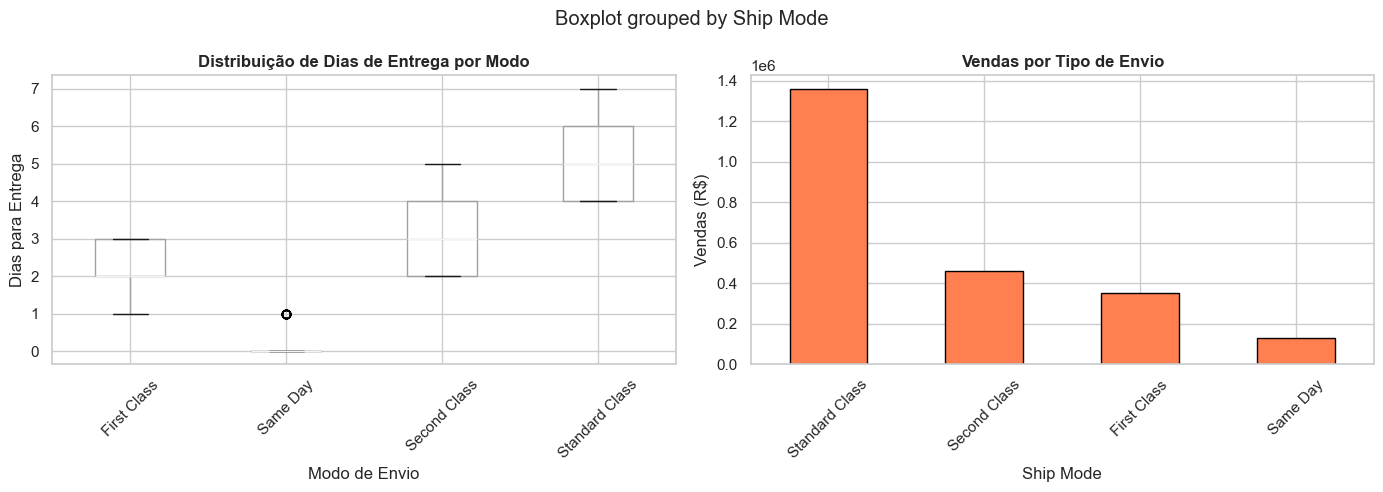

In [29]:
# Análise de Eficiência de Entrega
print("📦 Análise de Eficiência de Entrega:")
print(f"Dias médios para entrega: {df['Days_to_Ship'].mean():.2f} dias")
print(f"Mínimo de dias: {df['Days_to_Ship'].min()} dias")
print(f"Máximo de dias: {df['Days_to_Ship'].max()} dias")

# Distribuição por tipo de envio
shipping_analysis = df.groupby('Ship Mode').agg({
    'Days_to_Ship': 'mean',
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Total_Orders'})

print("\n🚚 Análise por Tipo de Envio:")
print(shipping_analysis)

# Gráficos de análise operacional
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dias para entrega por modo de envio
df.boxplot(column='Days_to_Ship', by='Ship Mode', ax=axes[0])
axes[0].set_title('Distribuição de Dias de Entrega por Modo', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Dias para Entrega')
axes[0].set_xlabel('Modo de Envio')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Vendas por tipo de envio
shipping_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
shipping_sales.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Vendas por Tipo de Envio', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Vendas (R$)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 🎯 Conclusões e Próximos Passos

### 📌 Principais Insights Encontrados:

1. **Financeiro**: Análise de lucro total, margem de lucro e identificação dos produtos mais rentáveis
2. **Vendas**: Tendências mensais, sazonalidade, ticket médio e distribuição por trimestre
3. **Geográfico**: Regiões mais lucrativas, distribuição de vendas por estado
4. **Clientes**: Segmentação de clientes (Consumer, Corporate, Home Office) e top clientes
5. **Operacional**: Eficiência de entrega, análise por modo de envio

### 🚀 Próximos Passos Recomendados:

- [ ] Criar dashboard interativo com Plotly/Dash
- [ ] Implementar análise preditiva para previsão de vendas
- [ ] Análise de sazonalidade detalhada com decomposição de séries temporais
- [ ] Segmentação avançada de clientes com clustering
- [ ] Mapa geográfico interativo com Folium ou Plotly
- [ ] Exportar relatórios em PDF com automação
- [ ] Análise de correlações e padrões de compra
- [ ] RFM Analysis (Recência, Frequência, Monetário) para segmentação de clientes